<a id="top"></a>
# Introduction to RDKit

Written by Torben Gutermuth, currently PhD Student in the group of [Prof. Rarey at the University of Hamburg](https://www.zbh.uni-hamburg.de/forschung/amd.html)

This Notebook is designed to give total beginners in cheminformatics a first glimpse at the usage of Rdkit. It is used in workshops for natural scientists (master students and graduate students). It is not meant to be used for self studying.



[RDKit](https://rdkit.org/) is an open-source cheminformatics software package which allows its users to easily work with molecules *in silico*. 
This is very useful if you want to work with molecule-dependent data (e.g. calculate the molecular weight of a set of compounds), if you want to display sets of molecules or if you want to do complex calculations or visualisations on molecules.
A great starting point (as well as quick-lookup opportunity) is [Rdkit getting started](https://www.rdkit.org/docs/GettingStartedInPython.html) and the [Rdkit cookbook](http://www.rdkit.org/docs/Cookbook.html). 

RDKit allows us to create molecule instances from molecule string representations called [SMILES](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html). 
[SMILES](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html) are not the focus of this Tutorial, if you want to learn more go the this [Tutorial](https://daylight.com/dayhtml_tutorials/languages/smiles/index.html).
After importing the Chem package we can create a molecule from a SMILES string, for example benzene:

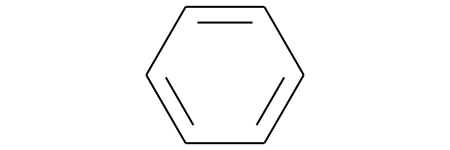

In [1]:
from rdkit import Chem
benzene = Chem.MolFromSmiles('c1ccccc1')
benzene

If we just type out a molecule in a jupyter notebook like this, it is displayed. 
This also works with more complicated molecules like caffeine:

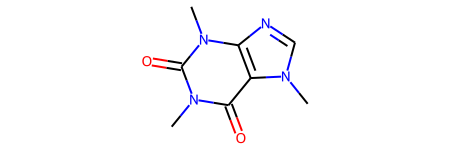

In [2]:
caffeine = Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')
caffeine

In addition of visualising single molecules, rdkit also allows us to compute a plethora of different descriptors of molecules. 
For example the number of bonds of a molecule, the number of atoms except hydrogen or the molecular weight of a compound:

In [3]:
from rdkit.Chem import Descriptors
print(caffeine.GetNumBonds())
print(caffeine.GetNumHeavyAtoms())
print(Descriptors.MolWt(caffeine))

15
14
194.194


We can also look for substuctures inside molecules using a language called [SMARTS](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html).
In this example, we calculate if caffeeine contains an imidazole substructure. 
If we now display the molecule again and the substructure was found, it is also highlighted:

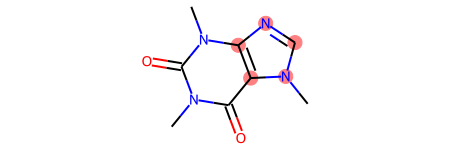

In [4]:
imidazole = Chem.MolFromSmarts('c1ncnc1')
caffeine.GetSubstructMatches(imidazole)
caffeine

Rdkit allows us not only to read in single molecules, but also sets of molecules that are in files. 
In this example we read in the file *some_dud_ligands.smi*, save the number of heavy atoms of all the molecules inside in a list and print that list:

In [5]:
import pathlib
import os

root_dir = pathlib.Path.cwd().parent
data_path = os.path.join(root_dir,'Data')
smi_file = os.path.join(root_dir,'Data','some_dud_ligands.smi')
suppl = Chem.SmilesMolSupplier(str(smi_file))
list_of_atomnumbers = []
for mol in suppl:
    list_of_atomnumbers.append(mol.GetNumAtoms())
print(list_of_atomnumbers)

[17, 16, 16, 15, 15, 18, 18, 16, 17, 21, 15, 19, 20, 21, 21, 23, 19, 23, 21, 21, 18, 25, 25, 25, 28, 29, 22, 23, 27, 25, 27, 23, 26, 20, 17, 25, 24, 21, 25, 28, 23, 22, 18, 13, 9, 9, 15, 27, 29, 30, 21, 16, 21, 24, 24, 22, 23, 22, 18, 22, 23, 22, 22, 22, 23, 24, 23, 22, 24, 23, 23, 24, 23, 23, 22, 23, 25, 25, 24, 24, 23, 23, 26, 28, 25, 26, 24, 26, 24, 24, 23, 29, 27, 25, 23, 26, 33, 23, 27]


Using pandas we can also read in a table containing the names of the molecules in the SMILES file and some arbitrary data:

In [6]:
import pandas as pd
table_file = os.path.join(root_dir,'Data','molecule_data.csv')
molecule_data = pd.read_csv(str(table_file), index_col=0)
print(molecule_data.head())

       Molnames  Data 1   Data 2  Data 3  Data 4  Data 5  Data 6  Data 7  \
0  ZINC01717164       0  HERBERT     123    7345       6      31       2   
1  ZINC02156329       0  HERBERT     123    7345       6      31       2   
2  ZINC03814205       0  HERBERT     123    7345       6      31       2   
3  ZINC03814207       0  HERBERT     123    7345       6      31       2   
4  ZINC03814208       0  HERBERT     123    7345       6      31       2   

   Data 8  Data 9  
0       5       3  
1       5       3  
2       5       3  
3       5       3  
4       5       3  


Using the PandasTools functionality we can combine the information in the SMILES file and the data in the table and create molecular depictions inside our dataframe. 
We can then export this as an HTML document or as an excel file, which can then be shared with others.

,Molnames,Molecule,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9
0,ZINC01717164,,0,HERBERT,123,7345,6,31,2,5,3
1,ZINC02156329,,0,HERBERT,123,7345,6,31,2,5,3
2,ZINC03814205,,0,HERBERT,123,7345,6,31,2,5,3
3,ZINC03814207,,0,HERBERT,123,7345,6,31,2,5,3
4,ZINC03814208,,0,HERBERT,123,7345,6,31,2,5,3
5,ZINC03814209,,0,HERBERT,123,7345,6,31,2,5,3
6,ZINC03814210,,0,HERBERT,123,7345,6,31,2,5,3
7,ZINC03814211,,0,HERBERT,123,7345,6,31,2,5,3
8,ZINC03814212,,0,HERBERT,123,7345,6,31,2,5,3
9,ZINC03814213,,0,HERBERT,123,7345,6,31,2,5,3

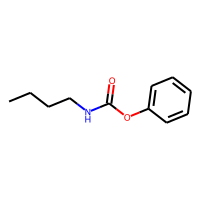
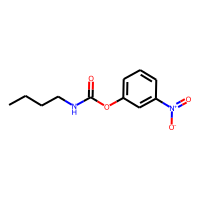
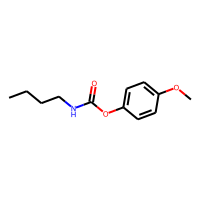
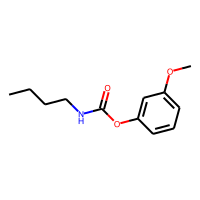
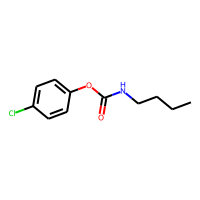
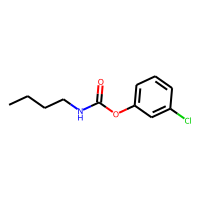
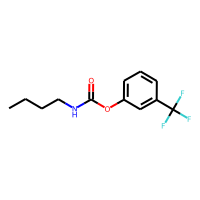
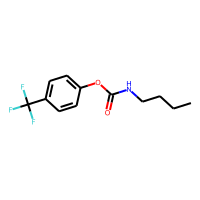
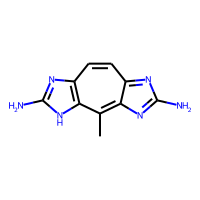
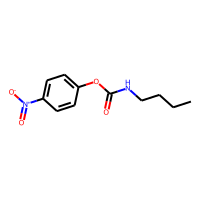
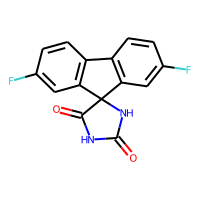
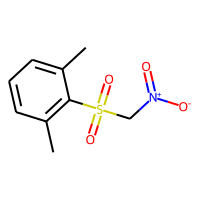
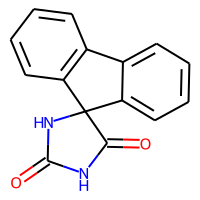
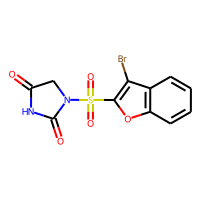
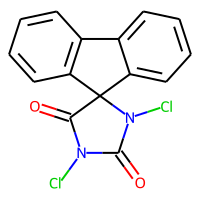
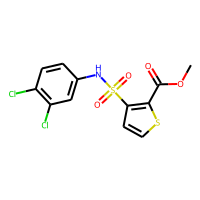
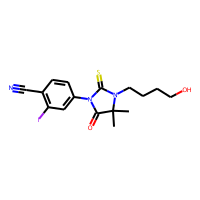
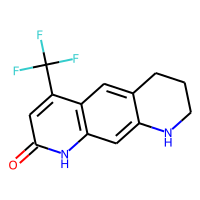
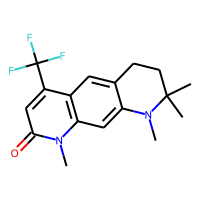
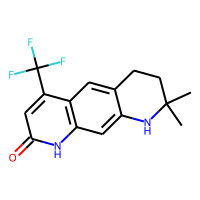
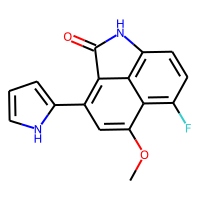
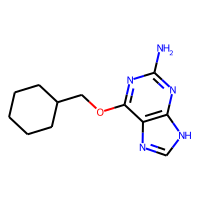
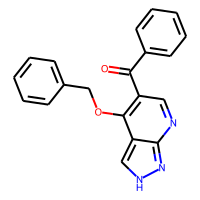
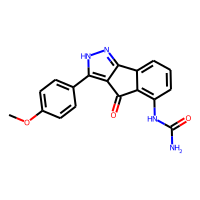
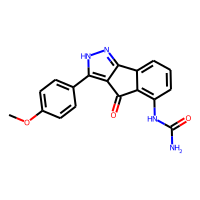
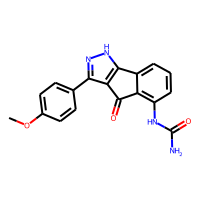
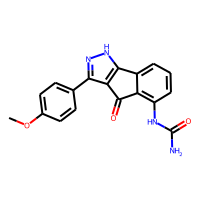
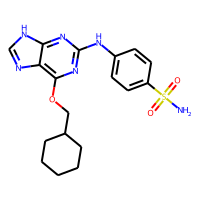
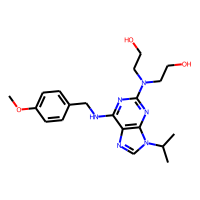
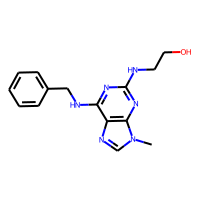
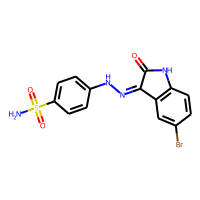
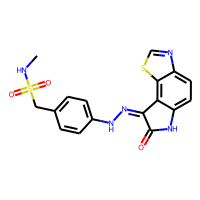
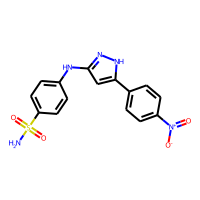
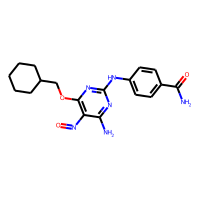
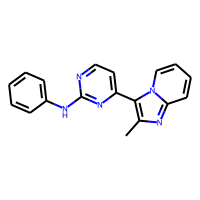
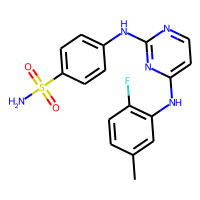
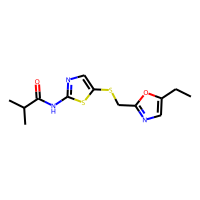
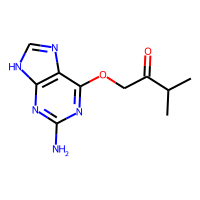
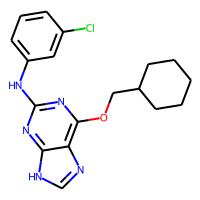
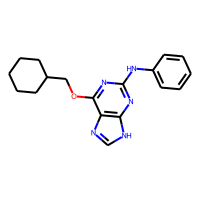
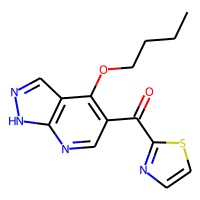
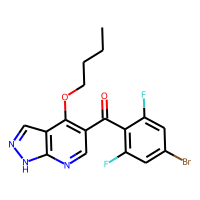
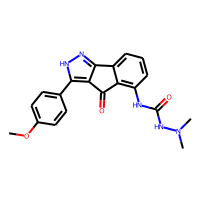
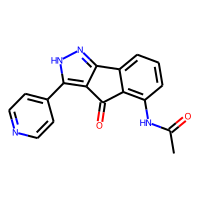
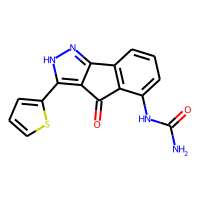
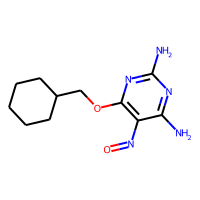
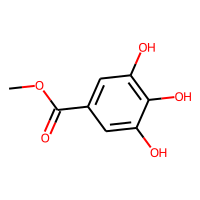
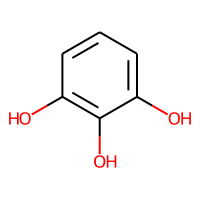
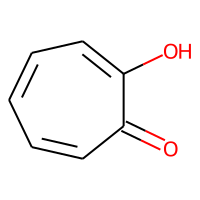
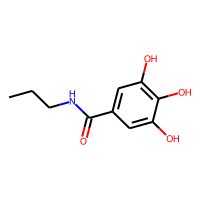
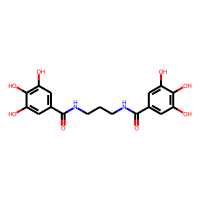
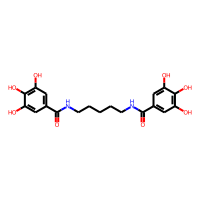
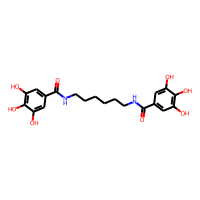
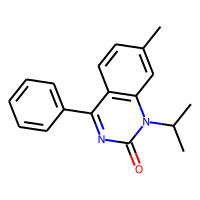
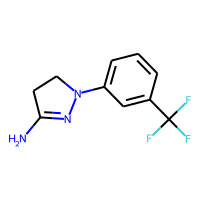
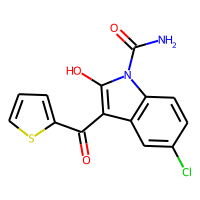
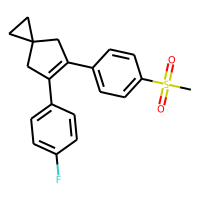
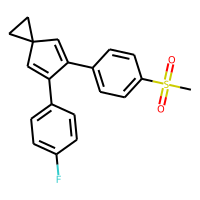
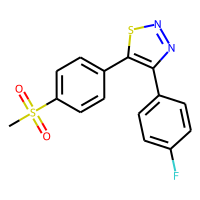
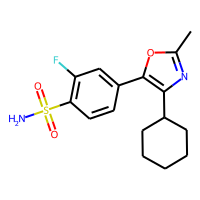
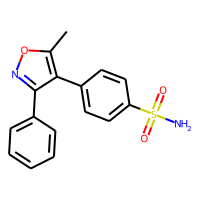
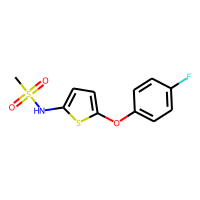
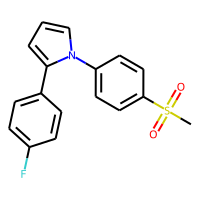
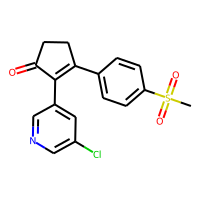
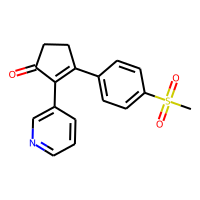
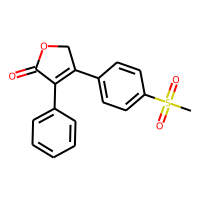
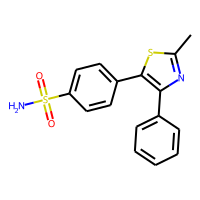
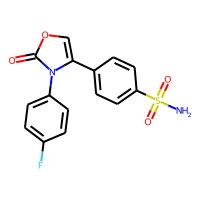
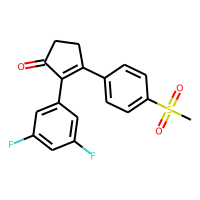
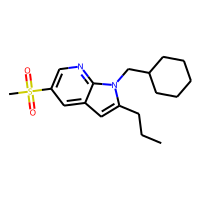
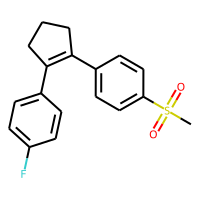
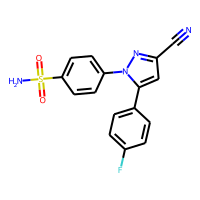
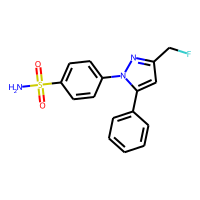
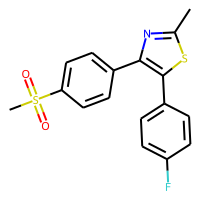
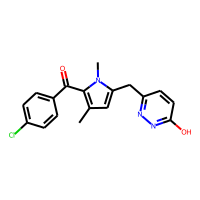
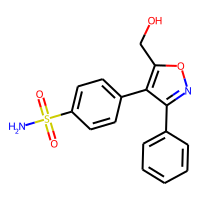
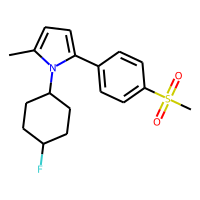
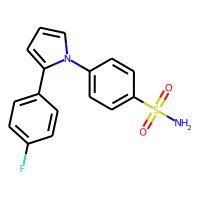
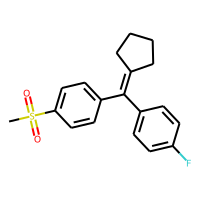
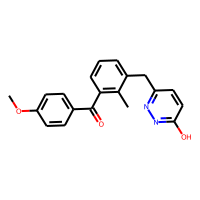
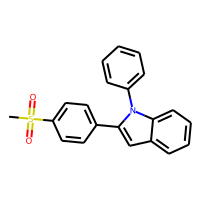
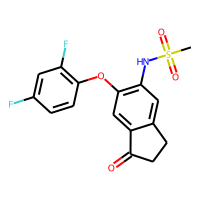
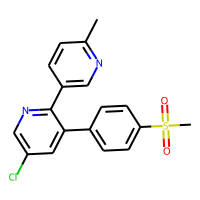
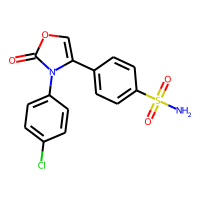
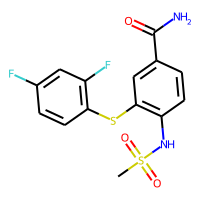
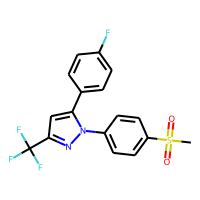
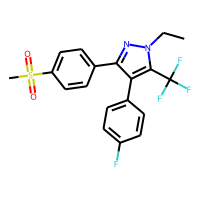
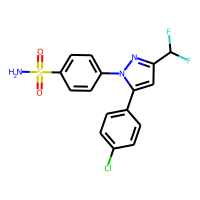
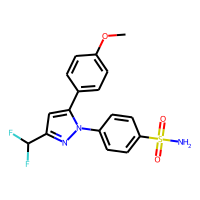
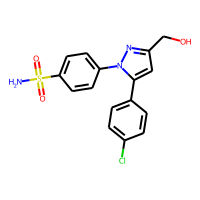
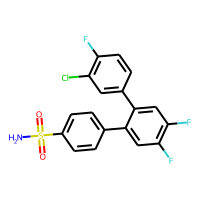
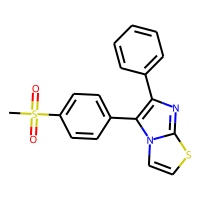
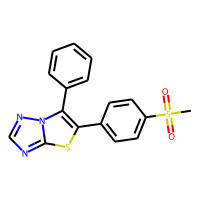
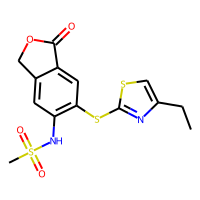
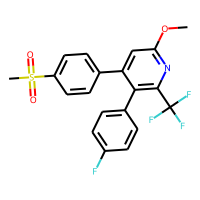
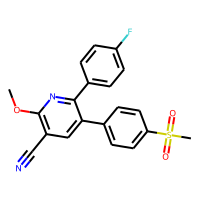
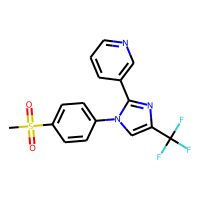
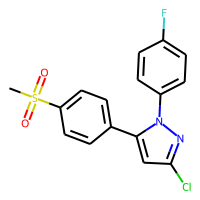
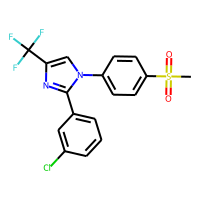
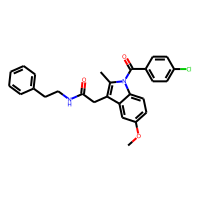
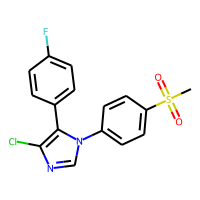
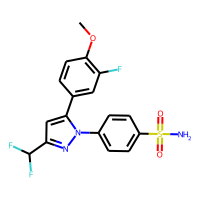

In [7]:
from rdkit.Chem import PandasTools
import IPython
smile_dataframe = pd.read_csv(str(smi_file),sep=" ", names=["Smiles", "Molnames"])
PandasTools.AddMoleculeColumnToFrame(smile_dataframe,'Smiles','Molecule',includeFingerprints=False)
PandasTools.ChangeMoleculeRendering(frame=smile_dataframe, renderer="PNG")
smile_dataframe = smile_dataframe.drop("Smiles", axis=1)
data_full = pd.merge(smile_dataframe,molecule_data, on="Molnames")
htm = data_full.to_html()
IPython.display.HTML(htm)